# Kelola Data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('data/car-sales-extended.csv')

In [3]:
dataframe.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
data = dataframe.drop('Price',axis=1)
price = dataframe['Price']

In [6]:
categorical_features = ['Make','Colour','Doors']
encoder = OneHotEncoder()
transformer = ColumnTransformer([('encoder',encoder,categorical_features)],remainder='passthrough')
transformed_data = transformer.fit_transform(data)

In [7]:
transformed_data

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [8]:
encoded_data = pd.get_dummies(data)

In [9]:
encoded_data.head()

,Odometer (KM),Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,35431,4,0,1,0,0,0,0,0,0,1
1,192714,5,1,0,0,0,0,1,0,0,0
2,84714,4,0,1,0,0,0,0,0,0,1
3,154365,4,0,0,0,1,0,0,0,0,1
4,181577,3,0,0,1,0,0,1,0,0,0


In [10]:
# Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encoded_data,price,test_size=0.2)

# Machine Learning Model

<img src="ml_map.png">

In [92]:
from sklearn.linear_model import Ridge

In [93]:
model = Ridge()

In [94]:
model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
prediction = model.predict(x_test)

In [96]:
prediction

array([ 9723.40911787, 19740.88511566, 21397.69810554, 15003.63826723,
       11291.92519255, 10770.65149997, 17081.30620978, 11355.3051766 ,
       13607.16067623, 16300.91604788, 30439.78904877, 11099.34844942,
       15501.4640514 , 15252.93877372,  8280.42603459, 24676.43154754,
        9719.8197142 , 18481.18485247,  9350.37967246, 11121.94492666,
       18968.27208466, 15138.52779049, 27261.15417014, 18141.07055101,
       17843.07426981, 22556.27896778, 18014.94252151,  9566.10608186,
       15575.055203  , 12537.60521071, 13795.09721488, 22438.1946777 ,
        9784.28739673, 28011.92911529, 33220.23723287, 21714.47031543,
       18465.73462308, 12093.25297613, 22341.20995782, 17671.2186377 ,
       32825.98405399, 16550.68288835, 16665.3687273 , 20937.07233763,
       11204.80897217, 24214.03851475, 13825.20378482, 18339.55553774,
       18530.98398369, 16632.06421134, 16405.18871207, 18183.57370979,
       17483.8651159 , 15164.92365859, 20234.73224966, 19997.22217492,
      

In [100]:
np.mean(y_test)

15852.16

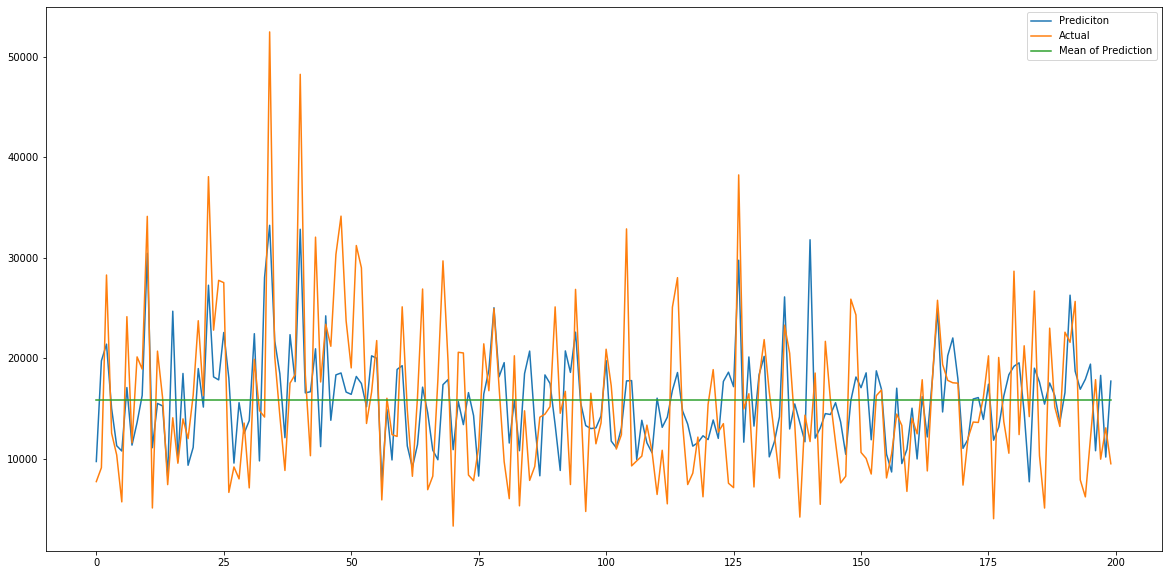

In [112]:
plt.figure(figsize=(20,10))
plt.plot(range(200),prediction,label='Prediciton')
plt.plot(range(200),y_test,label='Actual')
plt.plot(range(200),[15884.772370007631 for i in range(200)],label='Mean of Prediction')
plt.legend()

# Evaluating Model
Evauation Metrics for Regresion are :
* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Percentage Error (MAPE)
* R-Squared Score

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [119]:
def evaluateModel(y_true,y_pred):
    print('Your Evaluation Metrics')
    print(f'Mean Absolute Error (MAE) : {mean_absolute_error(y_true,y_pred)}')
    print(f'Root Mean Squared Error (RMSE) : {mean_squared_error(y_true,y_pred)}')
    print(f'R-Squared Score (r2) : {r2_score(y_true,y_pred)}')

In [120]:
evaluateModel(y_test,prediction)

Your Evaluation Metrics
Mean Absolute Error (MAE) : 5166.522130809222
Root Mean Squared Error (RMSE) : 41442836.91111041
R-Squared Score (r2) : 0.349140162993273
